### Pretrained CNNs
Keras provides classes that wrap more than two dozen popular pretrained CNNs. The full list is documented on the Keras website https://keras.io/api/applications/

- images must be sized to 224 x 224 before passing to pretrained CNNs for classification


In [20]:
from tensorflow.keras.applications import MobileNetV3Large
model = MobileNetV3Small(weights="imagenet", input_shape=(224, 224, 3))

In [21]:
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.applications.mobilenet_v3 import decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

x = image.load_img('Images/peregrine.png', target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# preprocess input handls all the work that is needed including applying unit variance to pixel values and converting RBG images to BGR format. in some cases you may still need to divide by 255

In [22]:
# once image is preprocessed, we predict
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [23]:
decode_predictions(y, top=5)

[[('n01608432', 'kite', 0.48726833),
  ('n01798484', 'prairie_chicken', 0.31827608),
  ('n01622779', 'great_grey_owl', 0.036404677),
  ('n02033041', 'dowitcher', 0.014756119),
  ('n02013706', 'limpkin', 0.010388466)]]

### Using ResNet50V2 to classify images

In [24]:
from tensorflow.keras.applications import ResNet152V2

model = ResNet152V2(weights='imagenet')
model.summary()

242745792/242745792 ━━━━━━━━━━━━━━━━━━━━ 57s 0us/step


Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 60,380,648 (230.33 MB)

 Trainable params: 60,236,904 (229.79 MB)

 Non-trainable params: 143,744 (561.50 KB)

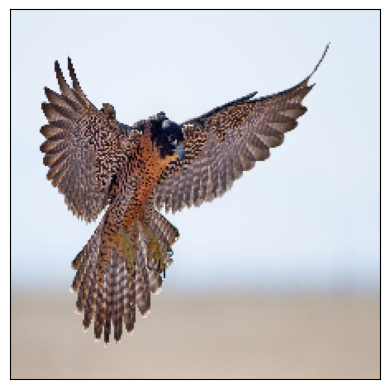

In [25]:
# lets load the bird image 
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

x = image.load_img('Images/peregrine.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [26]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


[[('n01608432', 'kite', 0.8812536),
  ('n01622779', 'great_grey_owl', 0.070081614),
  ('n01798484', 'prairie_chicken', 0.024721377),
  ('n01797886', 'ruffed_grouse', 0.0095216185),
  ('n02013706', 'limpkin', 0.003862713)]]

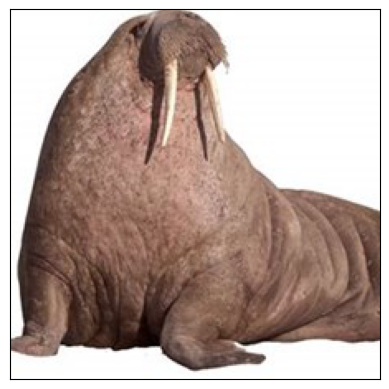

In [27]:
# lets try predicting a walrus image
x = image.load_img('Data/arctic-wildlife/samples/walrus/walrus_143.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)


In [28]:
# lets ask the CNN to classify it
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = model.predict(x)
decode_predictions(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


[[('n01704323', 'triceratops', 0.57328564),
  ('n02113978', 'Mexican_hairless', 0.18603039),
  ('n02074367', 'dugong', 0.08857625),
  ('n02398521', 'hippopotamus', 0.051565453),
  ('n02395406', 'hog', 0.03973497)]]

The CNN cannot identify or classify images that it has not been trained with but we can fix this using transfer learning. 

### Transfer Learning